## Phase 3.27
# K Nearest Neighbors (KNN)
## Objectives
- Get a high-level view of the <a href='#overview'>K-Nearest Neighbors</a> algorithm.
- Look at different <a href='#distance_metrics'>Distance Metrics</a> used with different ML models.
- <a href='#coding'>Code</a> through an example of KNN with a toy dataset.
- <a href='#recap'>Recap</a> KNN by talking through the Pros and Cons.

<a id='overview'></a>
# KNN - Overview

> ***Classifier implementing the k-nearest neighbors vote.***

---

K-Nearest Neighbors is a **non-parametric**, **lazy** learning algorithm. 
- **Non-parametric**: the model makes no *underlying assumptions* about the distribution of data.
- **Lazy learners** (or **instance-based** learning-methods) simply store the training examples and postpone the generalization until a new instance must be classified or prediction made.
    - In other words, no training is necessary! This makes training super fast but testing is slower and costly.
    
---
    
***QUESTION!***

> What color should the **gray point** be?

<img src='./images/knn_intro.png' width=40%>

---

KNN is one of the more simple-to-visualize model-types.
<img src='./images/knn-process.png'>
    

<a id='distance_metrics'></a>
# Distance Metrics

## Manhattan Distance
The first (and easiest) distance metric you'll cover is Manhattan distance. Manhattan distance is aptly named, because it measures the distance from one point to another traveling along the axes of a grid.

<img src='./images/manhattan_fs.png' width='300'>

$$ \large d(x,y) = \sum_{i=1}^{n}|x_i - y_i | $$

- For each dimension, you subtract one point's value from the other's, and add the absolute value to the running total.
- The final running total is the Manhattan Distance.

In [1]:
# Manhattan Distance
a = (0, 0)
b = (6, 6)

# # A short-version code:
# sum([abs(a-b) for a, b in zip(a, b)])

# A long-version code:
distance = 0
for a, b in zip(a, b):
    distance += abs(a - b)
distance

12

## Euclidean Distance
The equation at the heart of this one is probably familiar: $a^2 + b^2 = c^2$!

<img src='./images/euclidean_fs.png' width='300'>

$$ \large d(x,y) = \sqrt{\sum_{i=1}^{n}(x_i - y_i)^2} $$

- For each dimension, you subtract one point's value from the other's (to get the length of that "side" of the triangle in that dimension), square it, and add it to our running total. 
- The square root of that running total is our Euclidean distance.

In [2]:
import numpy as np

# Euclidean Distance
a = (0, 0)
b = (6, 6)

# # A short-version code:
# np.sqrt(sum([(a - b)**2 for a, b in zip(a, b)]))

# A long-version code:
distance = 0
for a, b in zip(a, b):
    distance += (a - b)**2
np.sqrt(distance)

8.48528137423857

## Generalized Distance Function: Minkowski Distance

The Minkowski Distance is the **generalized version of both of the above distance functions** with a customizable parameter: $c$.

$$\large d(x, y) = \left(\sum_{i=1}^{n}|x_i - y_i|^c\right)^\frac{1}{c}$$

For example:

> If: $c = 1$
> 
> $ \large d(x, y) = \left(\sum_{i=1}^{n}|x_i - y_i|^1\right)^\frac{1}{1}$
> 
> $=$
>
> $ \large d(x,y) = \sum_{i=1}^{n}|x_i - y_i | $ 

***(Manhattan Distance)***

> If: $c = 2$
> 
> $ \large d(x, y) = \left(\sum_{i=1}^{n}|x_i - y_i|^2\right)^\frac{1}{2}$
> 
> $=$
>
> $ \large d(x,y) = \sqrt{\sum_{i=1}^{n}(x_i - y_i)^2} $

***(Euclidean Distance)***

... and so on to *a Minkowski Distance with a value of 3*, *a Minkowski Distance with a value of 4*...

<a id='coding'></a>
# Coding! KNN

1. Load `diabetes` dataset.
2. Process data normally, including a train_test_split.
3. Create several models, experimenting with different K-values.
4. Track model performance with the training / test set.
    - *What Metrics could we use?*

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('./data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### Small exercise.

In [8]:
# import train test split
from sklearn.model_selection import train_test_split

In [9]:
df.drop('Outcome', axis=1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [10]:
# train test split the data
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=5, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((576, 8), (192, 8), (576,), (192,))

In [11]:
y_train.value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [12]:
y_test.value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [13]:
# import knn from sklearn.neighbor
from sklearn.neighbors import KNeighborsClassifier

In [14]:
# create model and fit
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
# knn.predict(X_train)

In [17]:
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score,
    classification_report,
    plot_confusion_matrix
)

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
plt.style.use(['ggplot', 'seaborn-talk'])

In [20]:
def get_metrics(clf, X, y):
    y_pred = clf.predict(X)
    
    my_metrics = (
        (accuracy_score, 'accuracy_score'),
        (recall_score, 'recall_score'),
        (precision_score, 'precision_score'),
        (f1_score, 'f1_score')
    )
    
    for f, name in my_metrics:
        print(name.title())
        print(f(y, y_pred))
        print()
        
    plot_confusion_matrix(clf, X, y, normalize='true', cmap='Reds')
    plt.grid(False)
    plt.show()

Accuracy_Score
0.7986111111111112

Recall_Score
0.6915422885572139

Precision_Score
0.7202072538860104

F1_Score
0.7055837563451777



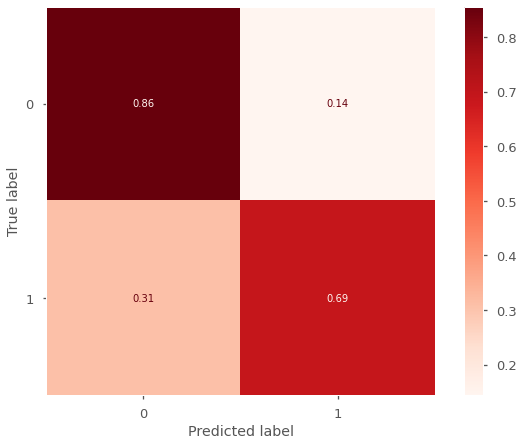

In [21]:
get_metrics(knn, X_train, y_train)

In [22]:
# Try out different values of K. p=2.
k_vals_lst = [1, 3, 5, 7, 9]

all_metrics = []
for k in k_vals_lst:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_pred_test = knn.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    prec = precision_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    all_metrics.append([acc, recall, prec, f1])

In [23]:
model_df_p2 = pd.DataFrame(
    np.array(all_metrics), 
    columns=['Accuracy', 'Recall', 'Precision', 'F1-Score'],
    index=k_vals_lst
)
model_df_p2

,Accuracy,Recall,Precision,F1-Score
1,0.703125,0.507463,0.586207,0.544000
3,0.723958,0.552239,0.616667,0.582677
5,0.713542,0.552239,0.596774,0.573643
7,0.703125,0.522388,0.583333,0.551181
9,0.687500,0.492537,0.559322,0.523810


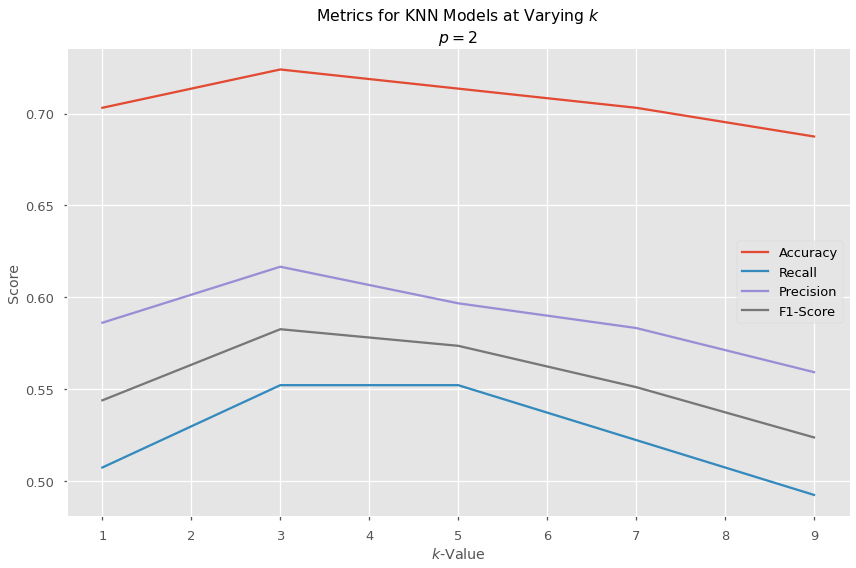

In [24]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(model_df_p2)
ax.set(
    title='Metrics for KNN Models at Varying $k$\n$p=2$',
    xlabel='$k$-Value',
    ylabel='Score'
    )
ax.legend(model_df_p2.columns)
fig.tight_layout()

In [25]:
# p=3 in KNN model.
k_vals_lst = [1, 3, 5, 7, 9]

all_metrics = []
for k in k_vals_lst:
    knn = KNeighborsClassifier(n_neighbors=k, p=3)
    knn.fit(X_train, y_train)
    
    y_pred_test = knn.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    prec = precision_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    all_metrics.append([acc, recall, prec, f1])

In [26]:
model_df_p3 = pd.DataFrame(
    np.array(all_metrics), 
    columns=['Accuracy', 'Recall', 'Precision', 'F1-Score'],
    index=k_vals_lst
)
model_df_p3

,Accuracy,Recall,Precision,F1-Score
1,0.697917,0.507463,0.576271,0.539683
3,0.729167,0.552239,0.627119,0.587302
5,0.739583,0.582090,0.639344,0.609375
7,0.703125,0.552239,0.578125,0.564885
9,0.677083,0.492537,0.540984,0.515625


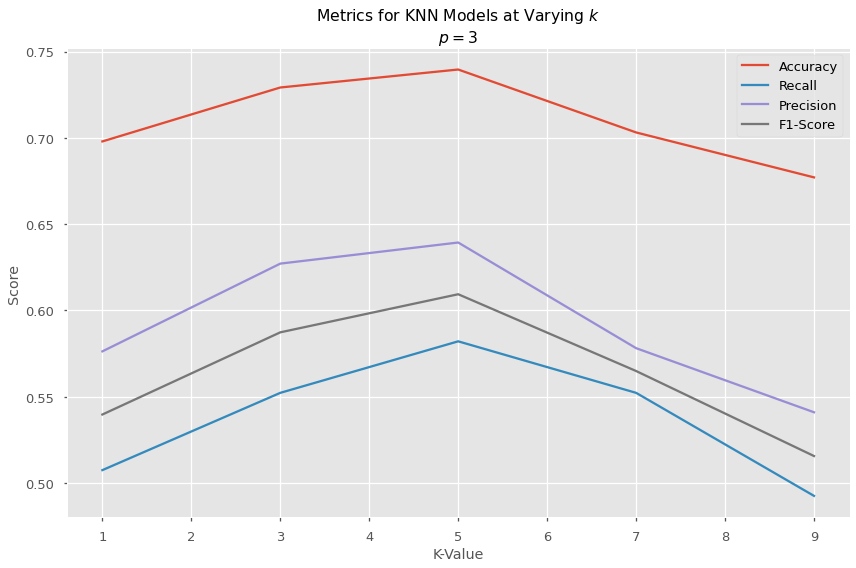

In [27]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(model_df_p3)
ax.set(
    title='Metrics for KNN Models at Varying $k$\n$p=3$',
    xlabel='K-Value',
    ylabel='Score'
    )
ax.legend(model_df_p3.columns)
fig.tight_layout()

<a id='recap'></a>
# Recap: Pros and Cons of KNNs 

**Pros:**
- No assumptions about data. 
    - Useful for nonlinear data.
- Simple algorithm to explain and understand/interpret.
- High accuracy (relatively).
    - It is pretty high but not competitive in comparison to better supervised learning models.
- Versatile.
    - Useful for classification or regression.

**Cons:**
- Computationally expensive.
    - The algorithm stores all of the training data.
    - High memory requirement.
- Prediction stage might be slow (with big $n$).
- Sensitive to irrelevant features and the scale of the data.

# Resources

- KNN: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
- Distance Metrics: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.euclidean_distances.html